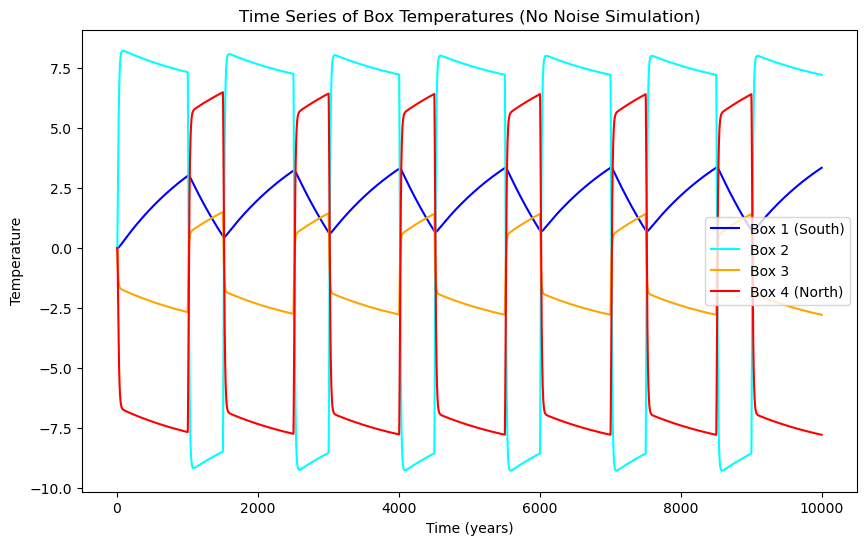

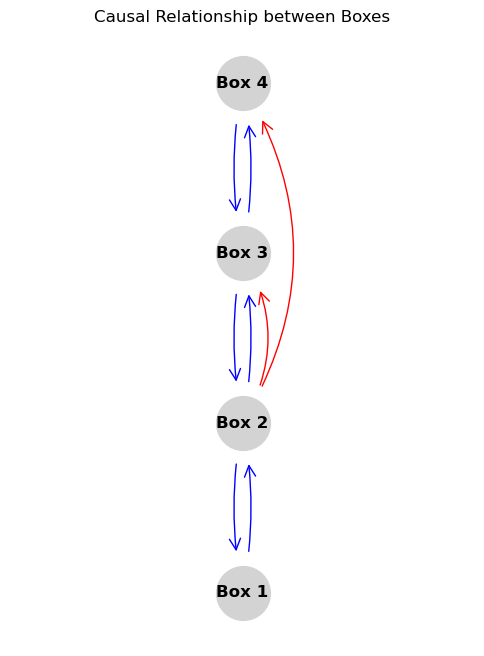

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import importlib
from toolbox import OneDModel_TBK as ODM

# Reload in case of modifications
importlib.reload(ODM)

# Run the model (using default parameters, with show_figures=False)
Temps, Fs, Fadvs = ODM.OneDModel(runlength=10000, show_figures=False)

# Assume dt = 1 year so that time is simply an array of timesteps.
nsteps = Temps.shape[-1]
time = np.arange(1, nsteps + 1)

# Choose the simulation with no noise (last simulation, index 9; true boxes are indices 1:5)
temp_no_noise = Temps[9, 0, 1:5, :]  # shape (4, nsteps)
box1 = temp_no_noise[0]  # Southern box
box2 = temp_no_noise[1]
box3 = temp_no_noise[2]
box4 = temp_no_noise[3]  # Northern box

# --- Plot 1: Time Series for Each Box ---
plt.figure(figsize=(10, 6))
plt.plot(time, box1, label='Box 1 (South)', color='blue')
plt.plot(time, box2, label='Box 2', color='cyan')
plt.plot(time, box3, label='Box 3', color='orange')
plt.plot(time, box4, label='Box 4 (North)', color='red')
plt.xlabel('Time (years)')
plt.ylabel('Temperature')
plt.title('Time Series of Box Temperatures (No Noise Simulation)')
plt.legend()
plt.show()

# --- Plot 2: Network Plot Showing Causal Relationships ---
# Create a MultiDiGraph to allow multiple edges between nodes.
G = nx.MultiDiGraph()

# Define positions for the nodes (vertically arranged)
G.add_node("Box 1", pos=(0, 0))
G.add_node("Box 2", pos=(0, 1))
G.add_node("Box 3", pos=(0, 2))
G.add_node("Box 4", pos=(0, 3))

# Diffusive coupling (bidirectional between adjacent boxes)
G.add_edge("Box 1", "Box 2", relation="diffusion")
G.add_edge("Box 2", "Box 1", relation="diffusion")
G.add_edge("Box 2", "Box 3", relation="diffusion")
G.add_edge("Box 3", "Box 2", relation="diffusion")
G.add_edge("Box 3", "Box 4", relation="diffusion")
G.add_edge("Box 4", "Box 3", relation="diffusion")

# Advective forcing: Box 2 drives heat toward Box 3 and Box 4.
G.add_edge("Box 2", "Box 3", relation="advective")
G.add_edge("Box 2", "Box 4", relation="advective")

# Get node positions
pos = nx.get_node_attributes(G, 'pos')

plt.figure(figsize=(6, 8))
# Draw nodes and labels
nx.draw_networkx_nodes(G, pos, node_size=1500, node_color='lightgray')
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

# Separate edges by relation type
diffusive_edges = [(u, v) for u, v, d in G.edges(data=True) if d['relation'] == 'diffusion']
advective_edges = [(u, v) for u, v, d in G.edges(data=True) if d['relation'] == 'advective']

# Draw diffusive arrows in blue (with a slight arc)
nx.draw_networkx_edges(G, pos,
                       edgelist=diffusive_edges,
                       arrowstyle='->',
                       arrowsize=20,
                       edge_color='blue',
                       connectionstyle='arc3, rad=0.1',
                       min_source_margin=30, 
                       min_target_margin=30,
                       )

# Draw advective arrows in red (with a larger arc to distinguish)
nx.draw_networkx_edges(G, pos,
                       edgelist=advective_edges,
                       arrowstyle='->',
                       arrowsize=20,
                       edge_color='red',
                       connectionstyle='arc3, rad=0.3',
                       min_source_margin=30,
                       min_target_margin=30,
                       )

plt.title('Causal Relationship between Boxes')
plt.axis('off')
plt.show()
